In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Reloading the module
import importlib

import Curve
importlib.reload(Curve)
from Curve import Curve2D


import OrthogonalPolynomials
importlib.reload(OrthogonalPolynomials)
from OrthogonalPolynomials import *

In [17]:
# Create a curve class
c = Curve2D(N=10)
# Set boundary parameter points to be Legendre Gauss Lobbato points
c.set_parameter_points(point_type="Legendre")
c.set_BarycentricWeights()
c.set_DiffMatrix()

In [18]:
# Testing reparameterization
R = 1
def x(t):
    return R * np.cos(t)

def y(t):
    return R * np.sin(t)

def x_deri(t):
    return -R * np.sin(t)

def y_deri(t):
    return R * np.cos(t)

par_range = np.array([0, np.pi/2])

c.reparameterization(x, y, x_deri, y_deri, par_range)


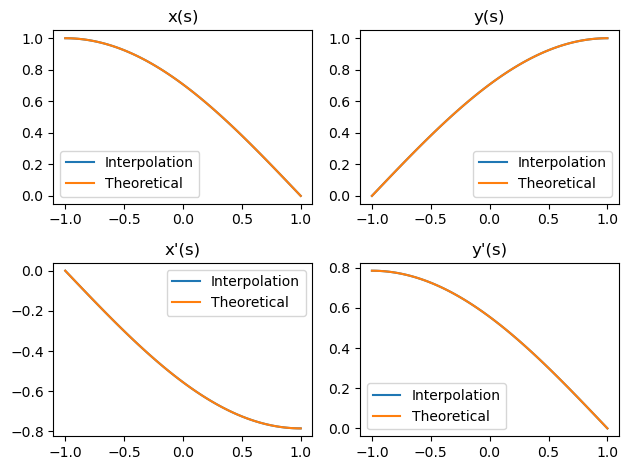

In [19]:
# Testing evaluation given a paramter value
s_nodes_plot = np.linspace(-1,1,101)
t_nodes_plot = np.pi/4 * (s_nodes_plot+1)

x_interp_plot = np.zeros(s_nodes_plot.shape)
x_th_plot = np.cos(t_nodes_plot)

y_interp_plot = np.zeros(s_nodes_plot.shape)
y_th_plot = np.sin(t_nodes_plot)

x_deri_interp_plot = np.zeros(s_nodes_plot.shape)
x_deri_th_plot = -np.sin(t_nodes_plot) * np.pi/4

y_deri_interp_plot = np.zeros(s_nodes_plot.shape)
y_deri_th_plot = np.cos(t_nodes_plot) * np.pi/4


for i, s in enumerate(s_nodes_plot):
    x_interp_plot[i] = c.cal_coordinates(s)[0]
    y_interp_plot[i] = c.cal_coordinates(s)[1]
    x_deri_interp_plot[i] = c.cal_derivatives(s)[0]
    y_deri_interp_plot[i] = c.cal_derivatives(s)[1]
    
    
fig, ax = plt.subplots(nrows=2, ncols=2)
ax[0,0].plot(s_nodes_plot, x_interp_plot, label='Interpolation')
ax[0,0].plot(s_nodes_plot, x_th_plot, label='Theoretical')
ax[0,0].legend()
ax[0,0].set_title('x(s)')


ax[0,1].plot(s_nodes_plot, y_interp_plot, label='Interpolation')
ax[0,1].plot(s_nodes_plot, y_th_plot, label='Theoretical')
ax[0,1].legend()
ax[0,1].set_title('y(s)')

ax[1,0].plot(s_nodes_plot, x_deri_interp_plot, label='Interpolation')
ax[1,0].plot(s_nodes_plot, x_deri_th_plot, label='Theoretical')
ax[1,0].legend()
ax[1,0].set_title("x'(s)")

ax[1,1].plot(s_nodes_plot, y_deri_interp_plot, label='Interpolation')
ax[1,1].plot(s_nodes_plot, y_deri_th_plot, label='Theoretical')
ax[1,1].legend()
ax[1,1].set_title("y'(s)")

fig.tight_layout()